In [178]:
import pandas as pd
import matplotlib as plt

In [147]:
ames = pd.read_csv("train.csv")

In [206]:
df = ames[['GarageType', "GarageCars","GarageArea","GarageQual","GarageCond","PavedDrive", "WoodDeckSF", "OpenPorchSF","EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea", "PoolQC", "Fence", "MiscFeature", "MiscVal", "MoSold", "YrSold", "SaleType", "SaleCondition", "SalePrice"]]

In [213]:
df['GarageType'].fillna("N")
df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [138]:
# GarageType - Garage or no Garage
# GarageCars
# GarageCond - further investigate
# PavedDrive - dummify them
# OpenPorchSF +
# EnclosedPorch + 
# ScreenPorch +
# YrSold
# SaleCodition Investigate Subgroups

In [205]:
#GarageType - Garage or no Garage 
df.loc[:,('GarageType')] = ['N' if x=="nan" else 'Y' for x in df['GarageType']]
df['GarageType']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: GarageType, Length: 1460, dtype: object

In [184]:
#Garagecars
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

(array([ 81.,   0., 369.,   0.,   0., 824.,   0., 181.,   0.,   5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

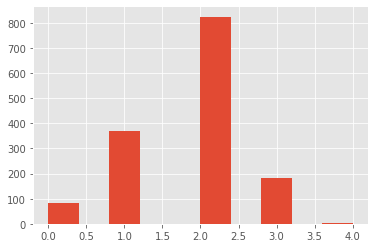

In [185]:
from matplotlib import pyplot as plt
plt.hist(df['GarageCars'])
# df["GarageCars"].value_counts()

Text(0, 0.5, 'SalePrice')

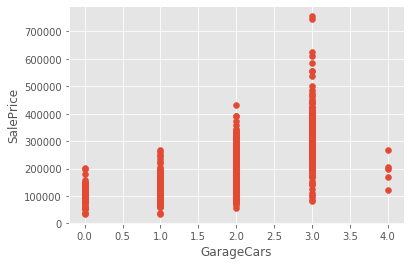

In [191]:
plt.scatter(df['GarageCars'], df['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')

In [200]:
df[['GarageCond']].value_count()

AttributeError: 'DataFrame' object has no attribute 'value_count'

In [179]:
OpenPorchSF +
EnclosedPorch + 
ScreenPorch +

df["Porch.Total"]= sum(df["OpenPorchSF"], df["EnclosedPorch"], df["ScreenPorch"])



SyntaxError: invalid syntax (<ipython-input-179-0f4af5799ac7>, line 1)